# Import library and dataset

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 47.8MB/s 
     |████████████████████████████████| 3.9MB 32.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6a93b50f8f12acdaef7dae2a35b397b4eaf0f57d3c1dcc369c5405e3d53ea11e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0


In [2]:
# IF USING COLAB
# from google.colab import drive
# drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np

# Also data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# sklearn for splitting the data
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

# tensorflow 
import tensorflow as tf # version=2.1.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(tf.__version__)

2.1.0


In [5]:
# data=pd.read_csv('/gdrive/My Drive/Bangkit/fake_job_postings.csv') #if using colab
data=pd.read_csv('fake_job_postings.csv')

data.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


# Selecting feature

In [ ]:
# Drop unused field to making a model

df = data.drop(columns=['job_id','title','location','department','company_profile','description','requirements','benefits'])

In [7]:
print('Drop some field of the dataset\n')
print('Shape of dataset before : ',data.shape)
print('Shape of dataset after : ',df.shape)

Drop some field of the dataset

Shape of dataset before :  (17880, 18)
Shape of dataset after :  (17880, 10)


# Checking NaN value

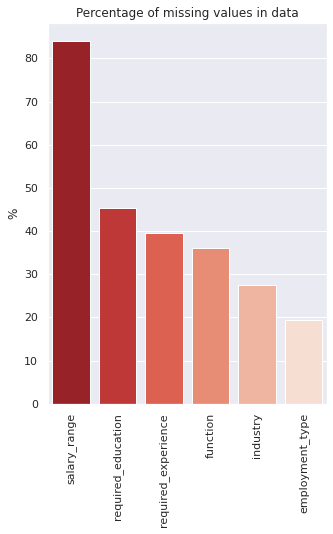

In [8]:
# check target nan value in the data 

combined = df.copy()
nan_percentage = combined.isnull().sum().sort_values(ascending=False) / combined.shape[0]
missing_val = nan_percentage[nan_percentage > 0]

plt.figure(figsize=(5,7))
sns.barplot(x=missing_val.index.values, y=missing_val.values * 100, palette="Reds_r");
plt.title("Percentage of missing values in data");
plt.ylabel("%");
plt.xticks(rotation=90);

# Taking care NaN value

```
Because salary_range has more than 50% NaN value of the data, so we will drop the feature of salary range. And the rest that contain NaN value is required_education, required_experience, function, industry, and employment_type. Those field which contain NaN value less than 50% will not dropped and will be replaced by string '-'. The reason why those value is not dropped or not replaced by other string that have rasional value is because in this case we think NaN value is not a missing value. So instead of we dropped or replace with rasional value, we think that NaN value is literally still NaN value.
```

In [ ]:
# Drop column salary range 

df = df.drop(['salary_range'], axis=1)

In [ ]:
# Replace NaN with '-' string

df = df.fillna('-')

In [11]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,-,-,Marketing,0
1,0,1,0,Full-time,Not Applicable,-,Marketing and Advertising,Customer Service,0
2,0,1,0,-,-,-,-,-,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Encode categorical variable from the data

In [12]:
pd.DataFrame([{'employment_type': len(df['employment_type'].value_counts()),    
               'required_experience': len(df['required_experience'].value_counts()),
               'required_education': len(df['required_education'].value_counts()),
               'industry': len(df['industry'].value_counts()),
               'function': len(df['function'].value_counts()),
              }], columns = ['employment_type', 'required_experience', 'required_education', 'industry', 'function'], 
              index = ['quantity of unique value'])

,employment_type,required_experience,required_education,industry,function
quantity of unique value,6,8,14,132,38


# Creating feature columns from our data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17880 non-null  int64 
 1   has_company_logo     17880 non-null  int64 
 2   has_questions        17880 non-null  int64 
 3   employment_type      17880 non-null  object
 4   required_experience  17880 non-null  object
 5   required_education   17880 non-null  object
 6   industry             17880 non-null  object
 7   function             17880 non-null  object
 8   fraudulent           17880 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
CATEGORICAL_COLUMNS = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
NUMERIC_COLUMNS = ['telecommuting', 'has_company_logo']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = df[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# Splitting the data

In [ ]:
X=df.drop("fraudulent", axis=1)
y=df["fraudulent"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=7)

# Define input function

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

In [18]:
ds = make_input_fn(X_train, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
    print('Some feature keys:', list(feature_batch.keys()))
    print()
    print('A batch of class:', feature_batch['employment_type'].numpy())
    print()
    print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

A batch of class: [b'Full-time' b'Contract' b'Full-time' b'Contract' b'-' b'Full-time'
 b'Part-time' b'Full-time' b'-' b'-']

A batch of Labels: [0 0 0 0 0 0 1 0 0 0]


In [19]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.95136416, 'accuracy_baseline': 0.9493306, 'auc': 0.8756192, 'auc_precision_recall': 0.38218242, 'average_loss': 0.14332831, 'label/mean': 0.05066938, 'loss': 0.14302802, 'precision': 0.5967742, 'prediction/mean': 0.045037962, 'recall': 0.12374582, 'global_step': 3750}


In [21]:
res_prediction = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpp9k43e7i/model.ckpt-3750
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
res_prediction

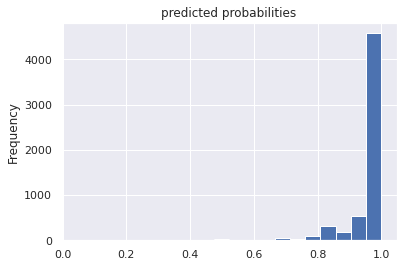

In [24]:
probs = pd.Series([pred['probabilities'][0] for pred in res_prediction])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

<h3>The result of the prediction give a conclusion that for each data that predicted using this model, have a high accuracy that proofing the prediction is correct</h3>


In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

### Receiver Operating Characteristic (ROC) of the results
it is show a better idea of the tradeoff between the true positive rate and false positive rate.

(0.0, 1.05)

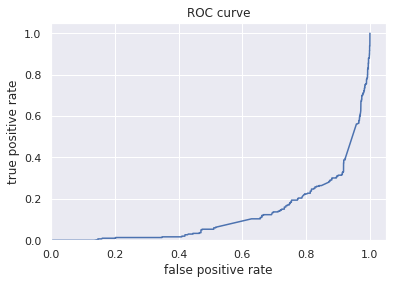

In [32]:
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

## Save the Model